
This is the lstm model for forecasting kospi volatility

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import data_reader as dr


In [3]:
data, source = dr.read('kospi.csv')

Loading data from file /home/changhyun/workspace/cxk858/dataset/kospi.csv...



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 0 to 1224
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1220 non-null   object 
 1   Open                 1220 non-null   float64
 2   High                 1220 non-null   float64
 3   Low                  1220 non-null   float64
 4   Close                1220 non-null   float64
 5   Adj Close            1220 non-null   float64
 6   Volume               1220 non-null   float64
 7   Daily_log_return     1219 non-null   float64
 8   Daily_trading_range  1220 non-null   float64
 9   Log_Volume_change    1219 non-null   float64
 10  Daily_return         1219 non-null   float64
 11  Target               1198 non-null   float64
dtypes: float64(11), object(1)
memory usage: 123.9+ KB


In [5]:
data = data.drop(['Date', 'Adj Close', 'Open', 'High', 'Close', 'Volume', 'Low'], axis=1)

In [6]:
x_values = data.iloc[:, :-1]
y_values = data[['Target']]

In [7]:
x_values.info()
y_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 0 to 1224
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Daily_log_return     1219 non-null   float64
 1   Daily_trading_range  1220 non-null   float64
 2   Log_Volume_change    1219 non-null   float64
 3   Daily_return         1219 non-null   float64
dtypes: float64(4)
memory usage: 47.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 0 to 1224
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  1198 non-null   float64
dtypes: float64(1)
memory usage: 19.1 KB


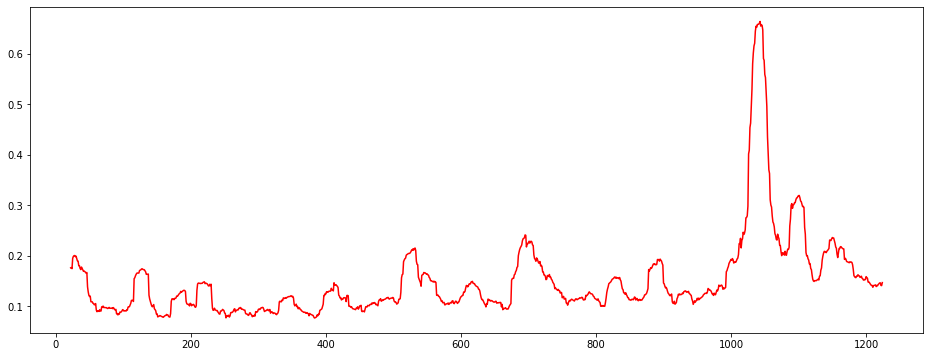

In [8]:
plt.figure(1, figsize=(16,6))
plt.plot(data['Target'], color='red')

In [9]:
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x_values)
scaled_y = scaler.fit_transform(y_values)

In [10]:

y_values

,Target
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1220,0.146351
1221,0.146712
1222,0.141543
1223,0.141185


In [11]:
split = int(len(data)*0.8)

In [12]:
window = 22
trainX = scaled_x[:split]
testX = scaled_x[split:]
trainY = scaled_y[:split]
testY = scaled_y[split:]


In [13]:
Xtrain = []
ytrain = []
Xtest = []
ytest = []

for i in range(window+1, len(trainX)):
    Xtrain.append(trainX[i-window:i, :trainX.shape[1]])
    ytrain.append(trainY[i])
for i in range(window, len(testX)):
    Xtest.append(testX[i-window:i, :testX.shape[1]])
    ytest.append(testY[i])

In [14]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 4))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [15]:

print(Xtrain.shape)
print(ytrain.shape)
print("-----")
print(Xtest.shape)
print(ytest.shape)

(953, 22, 4)
(953, 1)
-----
(222, 22, 4)
(222, 1)


In [16]:
print(Xtrain)

[[[0.55108613 0.11381363 0.5258597  0.529987  ]
  [0.49960791 0.09730357 0.56323903 0.47834842]
  [0.45040255 0.11122778 0.1800349  0.42941086]
  ...
  [0.55423428 0.04567997 0.47769379 0.53315967]
  [0.45926504 0.04953221 0.370603   0.43819488]
  [0.46584997 0.03858014 0.40161391 0.44473009]]

 [[0.49960791 0.09730357 0.56323903 0.47834842]
  [0.45040255 0.11122778 0.1800349  0.42941086]
  [0.55601714 0.16219098 0.456018   0.53495716]
  ...
  [0.45926504 0.04953221 0.370603   0.43819488]
  [0.46584997 0.03858014 0.40161391 0.44473009]
  [0.5941496  0.08227823 0.3460172  0.5735335 ]]

 [[0.45040255 0.11122778 0.1800349  0.42941086]
  [0.55601714 0.16219098 0.456018   0.53495716]
  [0.44493009 0.05382584 0.25950546 0.42399346]
  ...
  [0.46584997 0.03858014 0.40161391 0.44473009]
  [0.5941496  0.08227823 0.3460172  0.5735335 ]
  [0.51984132 0.03571817 0.30854324 0.49859092]]

 ...

 [[0.42954895 0.19521178 0.54696703 0.40879407]
  [0.52628527 0.05498204 0.34232036 0.50505241]
  [0.49306

In [17]:
print(ytrain)

[[0.16995754]
 [0.16639856]
 [0.20117979]
 [0.20766397]
 [0.21000711]
 [0.21057635]
 [0.20693356]
 [0.2083557 ]
 [0.20048095]
 [0.19243759]
 [0.19169112]
 [0.17628992]
 [0.17630958]
 [0.16707373]
 [0.16317871]
 [0.17168463]
 [0.16736623]
 [0.16202845]
 [0.1572713 ]
 [0.15834761]
 [0.15592028]
 [0.15455904]
 [0.15060859]
 [0.15330408]
 [0.10512372]
 [0.08808587]
 [0.07637883]
 [0.07235029]
 [0.07376428]
 [0.05465417]
 [0.05463245]
 [0.05444853]
 [0.0494458 ]
 [0.04859295]
 [0.04433961]
 [0.04547169]
 [0.04856451]
 [0.02666615]
 [0.02113746]
 [0.02362574]
 [0.02396903]
 [0.02196262]
 [0.02775195]
 [0.02328293]
 [0.0235165 ]
 [0.03771498]
 [0.03681324]
 [0.0401595 ]
 [0.03521265]
 [0.03549412]
 [0.03491862]
 [0.03489118]
 [0.03481138]
 [0.03257797]
 [0.03188217]
 [0.03391423]
 [0.03560305]
 [0.03307214]
 [0.03275461]
 [0.0329411 ]
 [0.03367784]
 [0.03153033]
 [0.03509109]
 [0.03299787]
 [0.02803507]
 [0.02771372]
 [0.02912185]
 [0.01396053]
 [0.01498891]
 [0.01037088]
 [0.01467821]
 [0.01

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from tensorflow import keras

In [293]:
model = Sequential()
model.add(LSTM(units=32, return_sequences=False, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(Xtrain, ytrain, batch_size=16, epochs=20, validation_split=0.2, shuffle=False)

Epoch 1/20
48/48 [==============================] - 2s 16ms/step - loss: 0.1708 - val_loss: 0.1458
Epoch 2/20
48/48 [==============================] - 0s 9ms/step - loss: 0.1992 - val_loss: 0.0736

In [260]:
# previous_model = keras.models.load_model('models/multi_layer_lstm_model')

In [294]:
forecast = model.predict(Xtest)

In [295]:
rev_forecast = scaler.inverse_transform(forecast)
rev_ytest = scaler.inverse_transform(ytest)

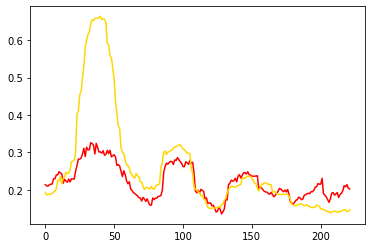

In [296]:
plt.plot(rev_forecast, color='red')
plt.plot(rev_ytest, color='gold')
# plt.savefig("images/single_layer_model_pred.png")

plt.show()

In [297]:
testScore = mean_squared_error(rev_ytest, rev_forecast)
print("test Score: {score} MSE".format(score=testScore))
root_testScore = mean_squared_error(rev_ytest, rev_forecast, squared=False)
print("test Score: {score} RMSE".format(score=root_testScore))
mape = mean_absolute_percentage_error(rev_ytest, rev_forecast)
print("test Score: {score} MAPE".format(score=mape))

test Score: 0.012053328314848599 MSE
test Score: 0.10978765101252781 RMSE
test Score: 0.1887784576433625 MAPE


In [275]:
# model.save("models/single_layer_lstm_model")

INFO:tensorflow:Assets written to: models/single_layer_lstm_model/assets


INFO:tensorflow:Assets written to: models/single_layer_lstm_model/assets
